#### Test Ripser \epsilon values

- Last Modified: 14 November, 2018
- Author: Zachary Neronha

In [86]:
library(TDA)
library(repr)
library(stringr)
library("scatterplot3d")
library("ripserr")
library("graphics")
library("ggplot2")

#### Ripser loading and binding

In [2]:
## Parse raw output from Ripser
parseOutput = function( output ){
    
    ## Number of intervals by dimension
    indices            = grep( "persistence intervals in dim " , output , value = FALSE )
    maxDimension       = length( indices ) - 1
    indices            = c( indices , length( output ) )
    
    ## Convert output in matrix
    diagram = matrix(, ncol = 3, nrow = 0 )
    
    ## Loop each group of intervals by dimension
    for( dim in 0:maxDimension ){
        
        ## Select intervals
        if( dim == maxDimension ){
            intervals = output[ ( indices[ dim + 1 ] + 1):( indices[ dim + 2 ] ) ]
        }else{
            intervals = output[ ( indices[ dim + 1 ] + 1):( indices[ dim + 2 ] - 1 ) ]
        }
        
        ## Removed lines from output
        intervals = grep( "\\[\\d*\\.?\\d+\\,\\d*\\.?\\d+\\)" , intervals , value = TRUE )
        
        ## Remove punctuation from intervals
        intervals = gsub( "(\\s|\\[|\\))" , "" , intervals )
        
        ## Split interval and convert to numeric
        intervals = as.numeric( unlist( strsplit( intervals , "," ) ) )
        
        ## Convert ouput in matrix
        intervals = matrix( intervals , ncol = 2 , byrow = T )
        
        ## Add dimension column
        intervals = cbind( rep( dim , nrow( intervals ) ) , intervals )
        
        ## Add intervals to diagram
        diagram = rbind( diagram, intervals )
        
    }
    
    ## Format matrix to diagram format
    colnames( diagram ) = c( "dimension" , "Birth" , "Death" )
    
    return( diagram )    
}

## Calculate rips diagram using Ripser library
ripserDiag = function( X, dimension, threshold, format = "point-cloud" ){
    
    # Ripser likes to read files in, so use a temporary file
    f = tempfile()
    write.table(X, f, col.names = FALSE, row.names = FALSE)
    
    ## Set parameters as text
    dimension = as.character( dimension )
    threshold = as.character( threshold )
    
    ## Run Ripser using system command
    ripserOut = system2("/home/labmember/ripser/ripser", args = c("--dim", dimension, "--threshold", threshold, "--format", format , f), stdout = TRUE)
    
    return( parseOutput( ripserOut ) )
}

In [132]:
dim1barcode = function(dimintervals){
    numintervals = dim(dimintervals)[1]
    ystep = 1/numintervals
    
    if (ystep==1){
        ystep = 0.5
    }
    ymat = 0:ystep:1
    g = ggplot()
    
    bmat = dimintervals[,2]
    dmat = dimintervals[,3]
    g = g + geom_point(aes(x = bmat,y = ymat,colour = 'red'))
    g = g + geom_point(aes(x = dmat,y = ymat,colour = 'red'))
    g = g + geom_segment(aes(x = bmat,y = ymat,xend = dmat,yend = ymat,colour = 'red'))
    
    g = g + ylab("feature") + xlab("epsilon")
    g = g + xlim(0,12) + ylim(0,1)
    return(g)
}

    dimension     Birth     Death
396         1 1.6640300 11.402800
397         1 0.0153417  0.173345


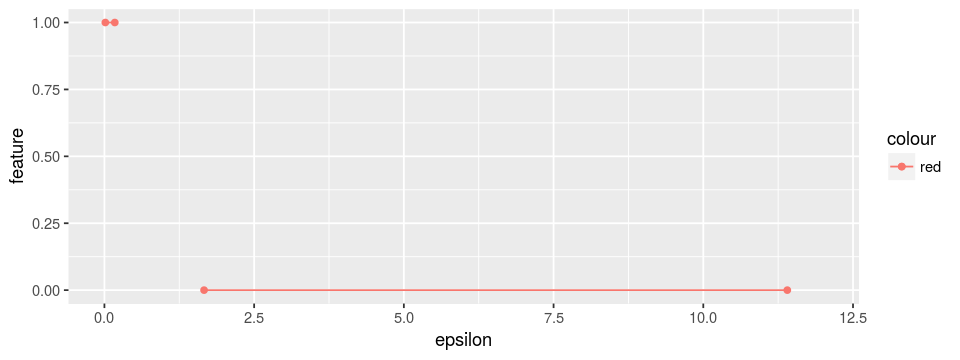

In [133]:
dim1barcode(dim1)
print(dim1)

#### Load data

In [3]:
myfiles = list.files(path = "SpatialScaleData/", pattern = "*.csv", all.files = FALSE,
           full.names = TRUE, recursive = FALSE,
           ignore.case = FALSE, include.dirs = FALSE, no.. = FALSE)

In [4]:
print(myfiles)

 [1] "SpatialScaleData//circle_diff_radii_10.csv"
 [2] "SpatialScaleData//circle_diff_radii_1.csv" 
 [3] "SpatialScaleData//circle_diff_radii_2.csv" 
 [4] "SpatialScaleData//circle_diff_radii_3.csv" 
 [5] "SpatialScaleData//circle_diff_radii_4.csv" 
 [6] "SpatialScaleData//circle_diff_radii_5.csv" 
 [7] "SpatialScaleData//circle_diff_radii_6.csv" 
 [8] "SpatialScaleData//circle_diff_radii_7.csv" 
 [9] "SpatialScaleData//circle_diff_radii_8.csv" 
[10] "SpatialScaleData//circle_diff_radii_9.csv" 


#### Compute persistence homology

[1] "File 10."
    dimension    Birth   Death
197         1 0.234527 1.73269
[1] "File 1."
    dimension      Birth     Death
729         1 7.50018000  7.597030
730         1 1.36653000 11.425500
731         1 0.18319400  1.693530
732         1 0.01579750  0.173308
733         1 0.00218701  0.017329


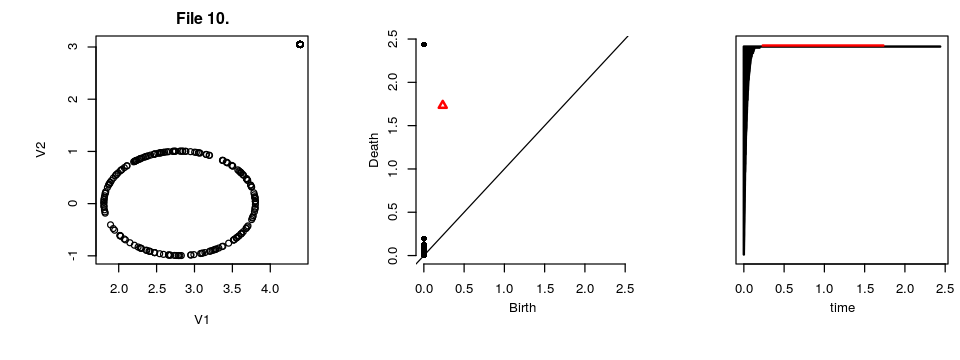

[1] "File 2."
    dimension   Birth   Death
201         1 1.77179 11.0656


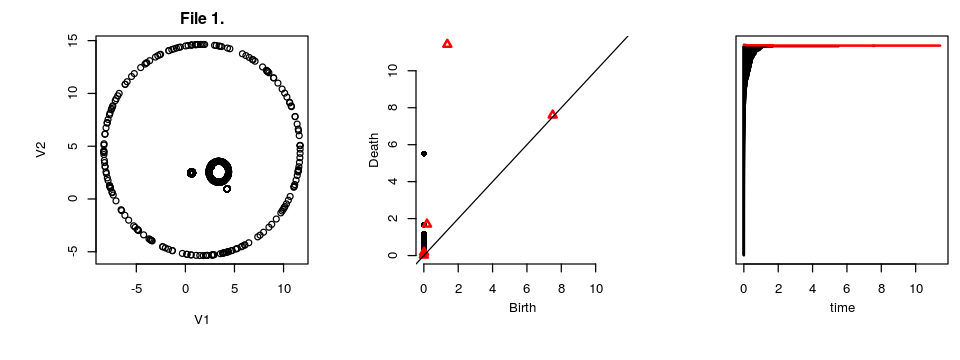

[1] "File 3."
    dimension    Birth    Death
401         1 1.305680 11.38830
402         1 0.238023  1.73296


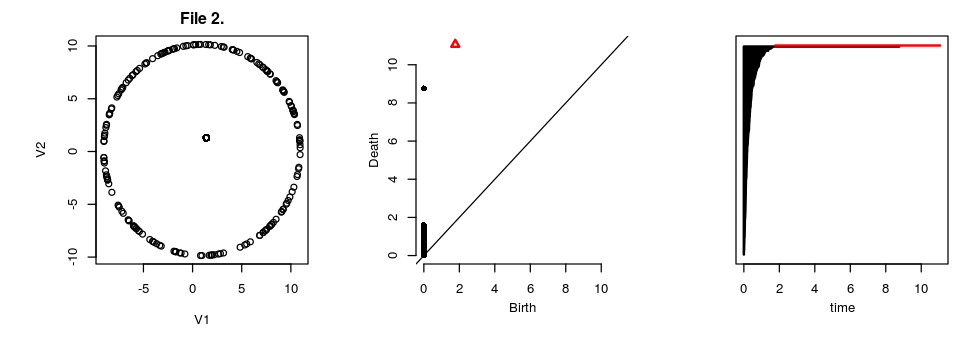

[1] "File 4."
    dimension     Birth    Death
593         1 7.9736600  7.97473
594         1 7.9709100  7.97093
595         1 7.9685300  7.96981
596         1 7.9682800  7.97961
597         1 1.9428000 10.03440
598         1 0.1653880  1.73327
599         1 0.0185507  0.17326


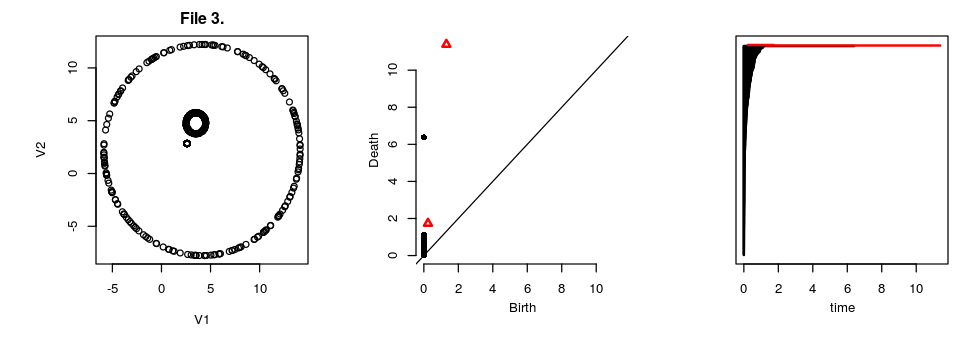

[1] "File 5."
    dimension    Birth    Death
398         1 6.993010  7.74712
399         1 1.793960 11.54560
400         1 0.160439  1.73276


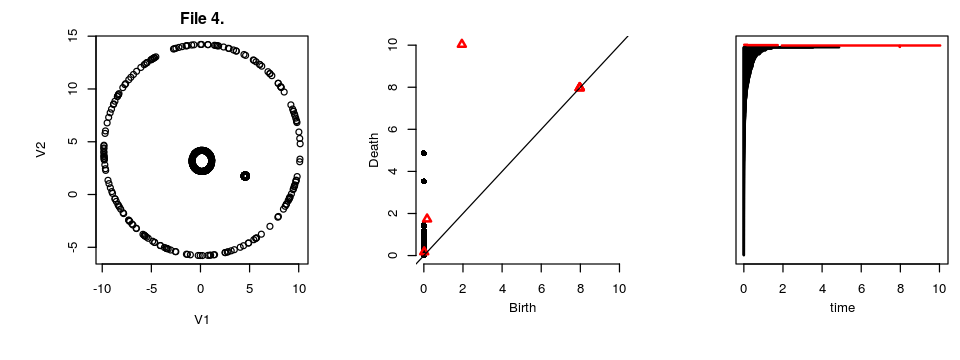

[1] "File 6."
    dimension       Birth       Death
407         1 7.996880000  8.37815000
408         1 2.274110000 11.56890000
409         1 0.157805000  1.73296000
410         1 0.000167203  0.00173419


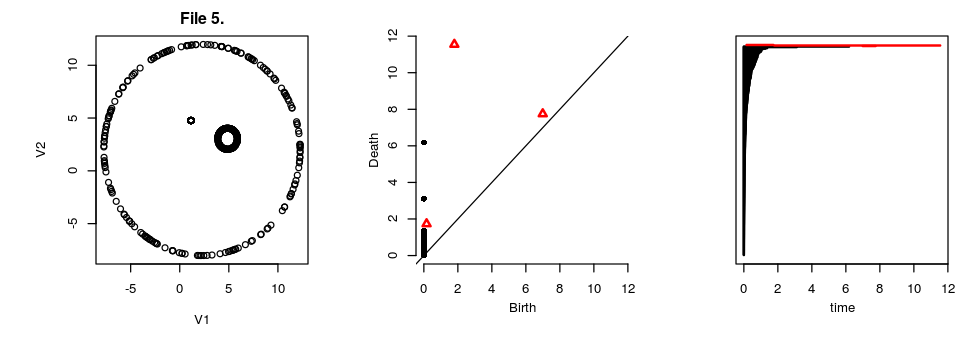

[1] "File 7."
    dimension      Birth      Death
546         1 7.72526000  7.7253300
547         1 2.23483000 10.2392000
548         1 0.15743800  1.6799700
549         1 0.00185263  0.0173273


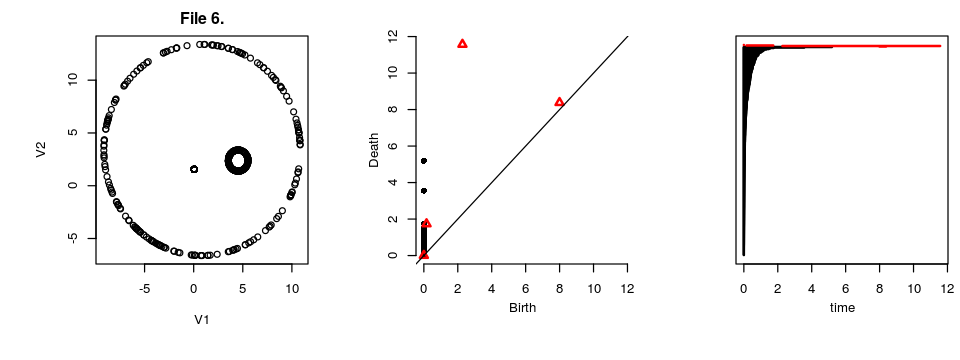

[1] "File 8."
    dimension     Birth     Death
594         1 2.5506500 10.511900
595         1 0.1832880  1.732830
596         1 0.0262132  0.173333


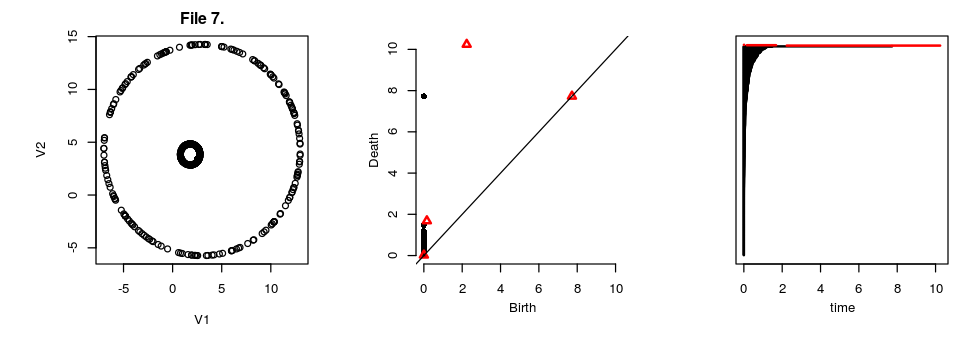

[1] "File 9."
    dimension     Birth     Death
396         1 1.6640300 11.402800
397         1 0.0153417  0.173345


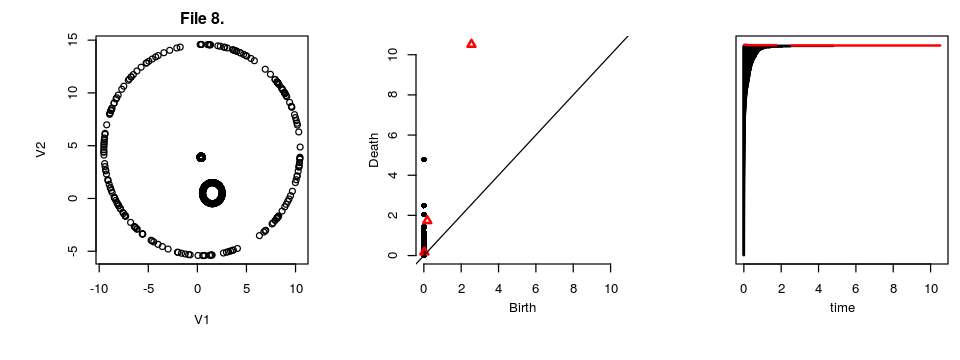

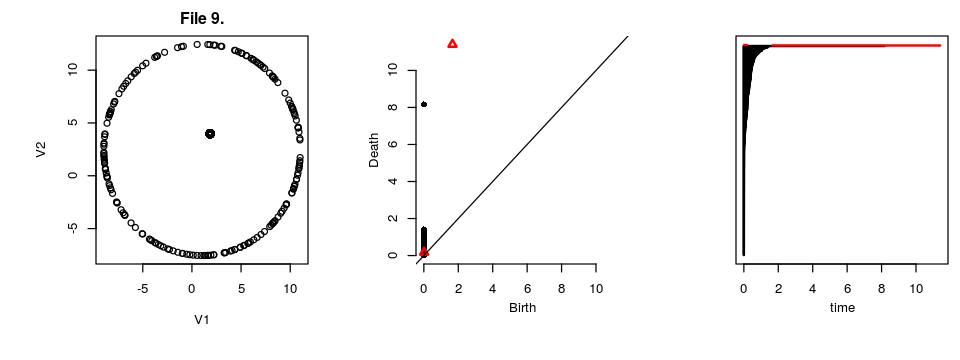

In [18]:
for (path in myfiles){

    datU = read.csv(path,header=FALSE)
    code = data.matrix(datU) 
    
    filenum = strsplit(path, "_", fixed = FALSE, perl = FALSE, useBytes = FALSE)[[1]][4]
    filenum = strsplit(filenum, "c",fixed = FALSE, perl = FALSE, useBytes = FALSE)[[1]][1]

    filenum = paste("File",filenum, sep = " ", collapse = NULL)

    homology2_code <- ripserDiag(code, 1, 30)
    
    intervals = as.data.frame(homology2_code)
    dim0 = intervals[intervals$dimension==0,]
    dim1 = intervals[intervals$dimension==1,]
    
    print(filenum[])
    print(dim1)
    
    
    par(mfrow = c(1, 3), mai = c(0.8, 0.8, 0.3, 0.1))
    options(repr.plot.width=8,repr.plot.height=3)
    
    plot(code, xlab=NULL, ylab=NULL, main = filenum[])
    TDA::plot.diagram(homology2_code, barcode = FALSE)
    TDA::plot.diagram(homology2_code, barcode = TRUE)

}

- Zoomed in versions of the the crocker plot
- Dim 1 betti intervals printed out
- Movie of points 10^-4 : 10
- Crocker plot: 10 eps values for each scale, log scale on the y axis